# Problem Definition

We will investigate the the miles per gallon (mpg) for cars with a number of features.
The data was downloaded from the UCI Machine learning repository.

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Missing Attribute Values:  horsepower has 6 missing values


References
Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [1]:
#Let's start off by loading the libraries required for this project
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy import arange
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Load Dataset

In [2]:
# Load dataset
filename = 'c:/users/Amir/Desktop/capstone001/auto-mpg.csv'
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin',
       'car name']
dataset = pd.read_csv(filename,index_col='car name',names=names)


# Analyze Data
Descriptive Statistics Let's check the dimensions of the dataset.

In [3]:
# shape
print(dataset.shape)

(398, 8)


In [4]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [5]:
# types
print(dataset.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [6]:
print(dataset.horsepower.unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [7]:
#We got remove the unknown value '?' 
dataset = dataset[dataset.horsepower != '?']
print('?' in dataset.horsepower)


False


In [8]:
print(dataset.shape)

(392, 8)


In [9]:
#We can have all the attributes numerical when we coerce horsepower to a float type
dataset.horsepower = dataset.horsepower.astype('float')
print(dataset.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [10]:
#Let's have a peek at the first 20 rows
print(dataset.head(20))

                               mpg  cylinders  displacement  horsepower  \
car name                                                                  
chevrolet chevelle malibu     18.0          8         307.0       130.0   
buick skylark 320             15.0          8         350.0       165.0   
plymouth satellite            18.0          8         318.0       150.0   
amc rebel sst                 16.0          8         304.0       150.0   
ford torino                   17.0          8         302.0       140.0   
ford galaxie 500              15.0          8         429.0       198.0   
chevrolet impala              14.0          8         454.0       220.0   
plymouth fury iii             14.0          8         440.0       215.0   
pontiac catalina              14.0          8         455.0       225.0   
amc ambassador dpl            15.0          8         390.0       190.0   
dodge challenger se           15.0          8         383.0       170.0   
plymouth 'cuda 340       

In [11]:
#descriptions
set_option('precision',1)
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
mean,23.4,5.5,194.4,104.5,2977.6,15.5,76.0,1.6
std,7.8,1.7,104.6,38.5,849.4,2.8,3.7,0.8
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0
25%,17.0,4.0,105.0,75.0,2225.2,13.8,73.0,1.0
50%,22.8,4.0,151.0,93.5,2803.5,15.5,76.0,1.0
75%,29.0,8.0,275.8,126.0,3614.8,17.0,79.0,2.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0


In [12]:
#To check the distribution 
print("Skewness of mpg: %f" % dataset['mpg'].skew())
print("skewness of displacement:%f" % dataset['displacement'].skew())
print("skewness of horsepower:%f"%dataset['horsepower'].skew())
print("skewness of weight:%f"%dataset['weight'].skew())
print("skewness of acceleration:%f"%dataset['acceleration'].skew())


Skewness of mpg: 0.457092
skewness of displacement:0.701669
skewness of horsepower:1.087326
skewness of weight:0.519586
skewness of acceleration:0.291587


In [13]:
#initialize
dataset_original = dataset.copy()
dataset_scaled=dataset.copy()

# Scale the data

In [14]:
def scale(x):
    y = (x-x.min())/(x.max()-x.min())
    return y

In [15]:
dataset_scaled ['displacement'] = scale(dataset_scaled['displacement'])
dataset_scaled['horsepower'] = scale(dataset_scaled['horsepower'])
dataset_scaled['acceleration'] = scale(dataset_scaled['acceleration'])
dataset_scaled['weight'] = scale(dataset_scaled['weight'])
dataset_scaled['mpg'] = scale(dataset_scaled['mpg'])


In [16]:
dataset_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.2,8,0.6,0.5,0.5,0.2,70,1
buick skylark 320,0.2,8,0.7,0.6,0.6,0.2,70,1
plymouth satellite,0.2,8,0.6,0.6,0.5,0.2,70,1
amc rebel sst,0.2,8,0.6,0.6,0.5,0.2,70,1
ford torino,0.2,8,0.6,0.5,0.5,0.1,70,1


In [17]:
#correlation
set_option('precision',2)
print(dataset.corr(method='pearson'))

               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.81       -0.78   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.50   
displacement -0.81       0.95          1.00        0.90    0.93         -0.54   
horsepower   -0.78       0.84          0.90        1.00    0.86         -0.69   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.50         -0.54       -0.69   -0.42          1.00   
model year    0.58      -0.35         -0.37       -0.42   -0.31          0.29   
origin        0.57      -0.57         -0.61       -0.46   -0.59          0.21   

              model year  origin  
mpg                 0.58    0.57  
cylinders          -0.35   -0.57  
displacement       -0.37   -0.61  
horsepower         -0.42   -0.46  
weight             -0.31   -0.59  
acceleration        0.29    0.21  
model year          1.00 

In [18]:
#Let's codify our origin feature better
dataset['Origin_code'] = dataset.origin.replace([1,2,3],['USA','Europe','Japan'])
dataset_scaled['Origin_code'] = dataset.origin.replace([1,2,3],['USA','Europe','Japan'])

In [19]:
print(dataset.head())

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  model year  origin Origin_code  
car name                                                                 
chevrolet chevelle malibu          12.0          70       1         USA  
buick skylark 320                  11.5          70       1         USA  
plymouth satellite                 11.0          70       1         USA  
amc rebel sst                      12.0          70       1         U

# MPG's per origin 

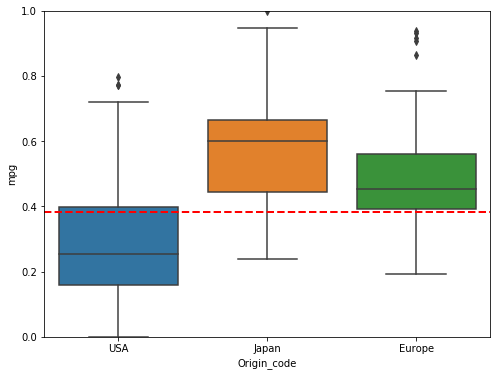

In [20]:
cont = 'Origin_code'
dataset_plt = pd.concat([dataset_scaled['mpg'], dataset_scaled[cont]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cont, y="mpg", data=dataset_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(dataset_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

# MPG per model year

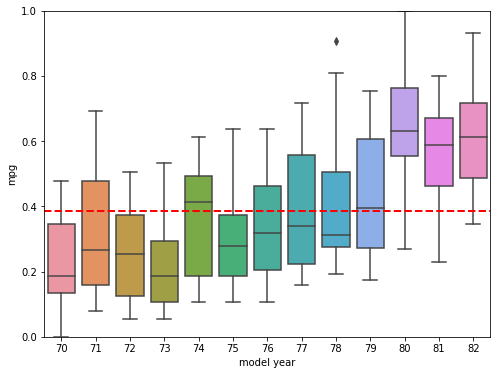

In [22]:
cont = 'model year'
dataset_plt = pd.concat([dataset_scaled['mpg'], dataset_scaled[cont]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cont, y="mpg", data=dataset_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(dataset_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


The MPG generally gets better as the year goes by

# MPG per cylinders

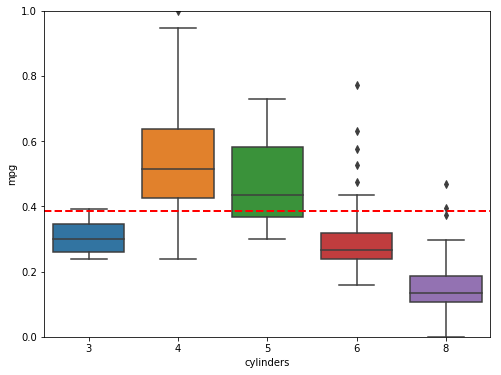

In [23]:
cont = 'cylinders'
dataset_plt = pd.concat([dataset_scaled['mpg'], dataset_scaled[cont]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cont, y="mpg", data=dataset_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(dataset_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

From the plot we see the cylinders 4 and 5 have better MPG

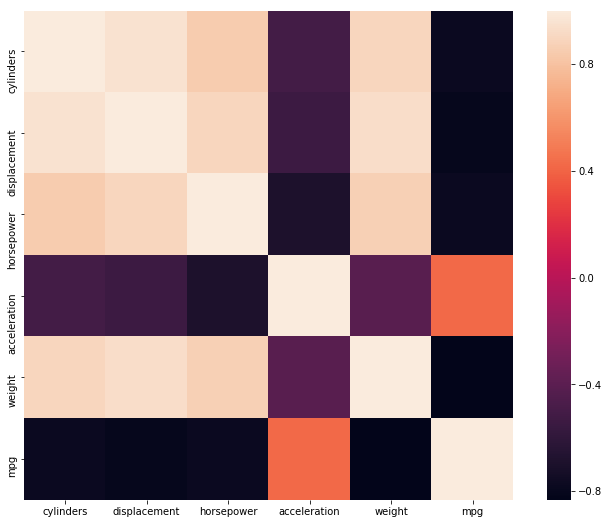

In [24]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
correlationmat = dataset[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlationmat, square=True);

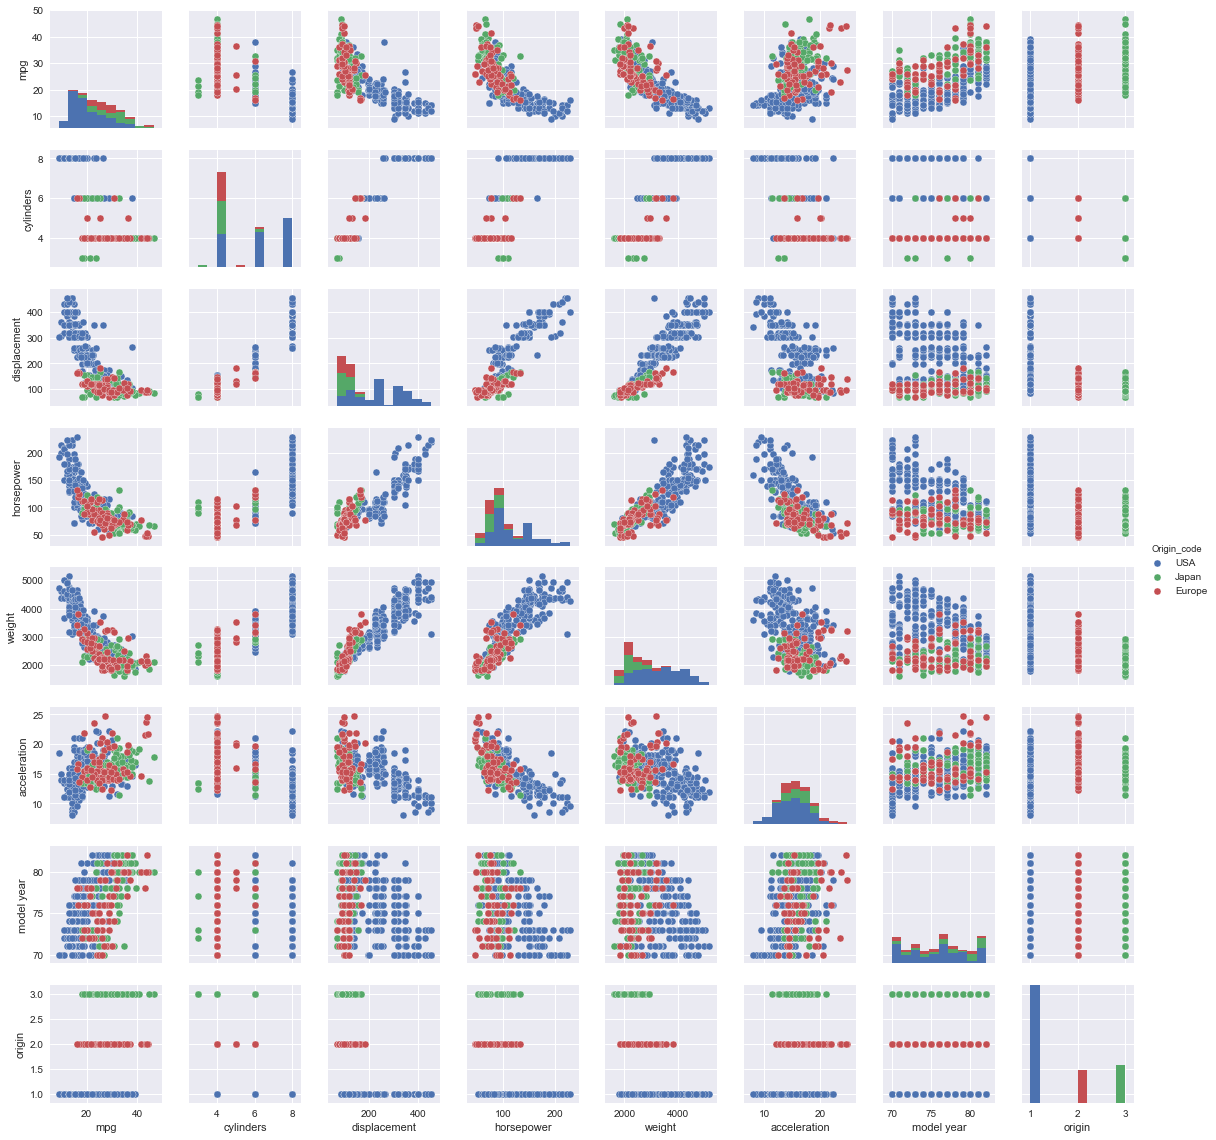

In [25]:
#scatterplot
sns.set()
sns.pairplot(dataset, size = 2.0,hue ='Origin_code')
plt.show()

# MPG distribution by company

In [26]:
print(dataset.index)

Index([u'chevrolet chevelle malibu', u'buick skylark 320',
       u'plymouth satellite', u'amc rebel sst', u'ford torino',
       u'ford galaxie 500', u'chevrolet impala', u'plymouth fury iii',
       u'pontiac catalina', u'amc ambassador dpl',
       ...
       u'chrysler lebaron medallion', u'ford granada l', u'toyota celica gt',
       u'dodge charger 2.2', u'chevrolet camaro', u'ford mustang gl',
       u'vw pickup', u'dodge rampage', u'ford ranger', u'chevy s-10'],
      dtype='object', name=u'car name', length=392)


In [27]:
dataset[dataset.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index([u'subaru dl', u'subaru dl', u'subaru dl', u'subaru dl'], dtype='object', name=u'car name')

In [28]:
dataset['Company'] = dataset.index.str.extract('(^.*?)\s')

In [29]:
dataset.loc[dataset['Company']=='volkswagen','Company']='VW'
dataset.loc[dataset['Company']=='vokswagen','Company']='VW'
dataset.loc[dataset['Company']=='vw','Company']='VW'
dataset.loc[dataset['Company'] =='maxda','Company']='mazda'
dataset.loc[dataset['Company'] == 'toyouta','Company']='toyota'
dataset.loc[dataset['Company'] =='mercedes','Company']='mercedes-benz'
dataset.loc[dataset['Company'] == 'nissan','Company']='datsun'
dataset.loc[dataset['Company'] =='capri','Company']='ford'
dataset.loc[dataset['Company'] =='chevroelt','Company']='chevrolet'
dataset.loc[dataset['Company'] =='chevy','Company']='chevrolet'
dataset['Company'].fillna(value ='subaru',inplace=True)  
## Strin methords will not work on null values so 

In [30]:
print(dataset.head())

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  model year  origin Origin_code  \
car name                                                                  
chevrolet chevelle malibu          12.0          70       1         USA   
buick skylark 320                  11.5          70       1         USA   
plymouth satellite                 11.0          70       1         USA   
amc rebel sst                      12.0          70       1     

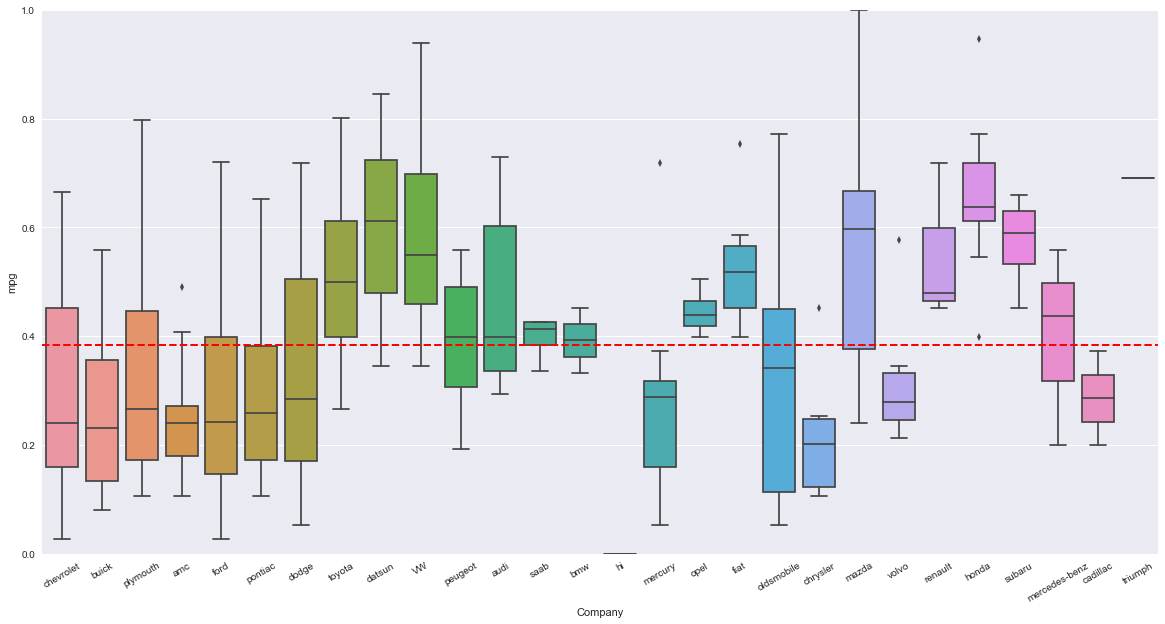

In [31]:
cont = 'Company'
dataset_plt = pd.concat([dataset_scaled['mpg'], dataset[cont]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=cont, y="mpg", data=dataset_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(dataset_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [32]:
dataset.Company.isnull().any()

False

In [33]:
cont='mpg'
dataset[dataset[cont]== dataset[cont].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Origin_code,Company
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,hi


In [34]:
dataset[dataset[cont]== dataset[cont].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Origin_code,Company
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,mazda


In [35]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
Origin_code      object
Company          object
dtype: object

In [36]:
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Origin_code,Company
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,chevrolet
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,buick
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,plymouth
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,amc
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,ford


In [37]:
print(dataset_original.columns)

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'model year', u'origin'],
      dtype='object')


In [38]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = dataset_original.values
X = array[:,1:8]
Y = array[:,0]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size,
                                                                random_state=seed)

# Evaluate Algorithms:Baseline

In [39]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'

In [40]:
# test different Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [41]:
# evaluate each model in turn
#The algorithms all use default tuning parameters
#We will see the mean and standard deviation of MSE for each algorithm
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -11.787948 (3.734628)
LASSO: -12.565943 (4.537181)
EN: -12.500368 (4.539554)
KNN: -18.882610 (5.635554)
CART: -13.450552 (4.632577)
SVR: -64.135052 (10.803950)


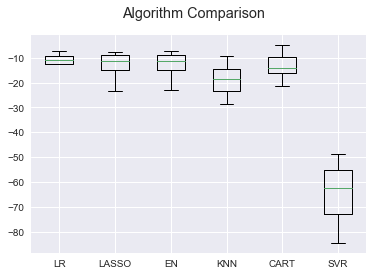

In [42]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -11.787948 (3.734628)
ScaledLASSO: -13.495080 (5.188032)
ScaledEN: -14.980568 (4.630630)
ScaledKNN: -9.558863 (3.520404)
ScaledCART: -14.368351 (4.228610)
ScaledSVR: -10.528542 (5.174274)


We see that KNN has a lower error.

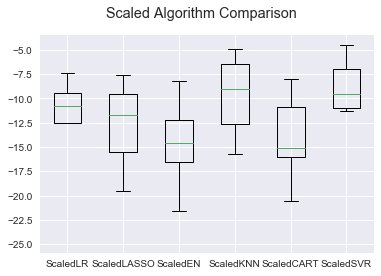

In [44]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Improve results with tuning

In [45]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [46]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.497569 using {'n_neighbors': 5}
-13.737668 (6.371700) with: {'n_neighbors': 1}
-11.118775 (4.035139) with: {'n_neighbors': 3}
-9.497569 (3.446709) with: {'n_neighbors': 5}
-9.890278 (3.350748) with: {'n_neighbors': 7}
-10.319100 (3.875128) with: {'n_neighbors': 9}
-10.196365 (3.771464) with: {'n_neighbors': 11}
-10.481448 (3.849311) with: {'n_neighbors': 13}
-10.470779 (4.009455) with: {'n_neighbors': 15}
-10.552783 (4.240354) with: {'n_neighbors': 17}
-10.689680 (4.197250) with: {'n_neighbors': 19}
-10.995337 (4.336968) with: {'n_neighbors': 21}


Ensemble Methods

In [47]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -10.058592 (3.930987)
ScaledGBM: -8.357384 (3.736100)
ScaledRF: -9.578422 (3.982686)
ScaledET: -8.393197 (3.289177)


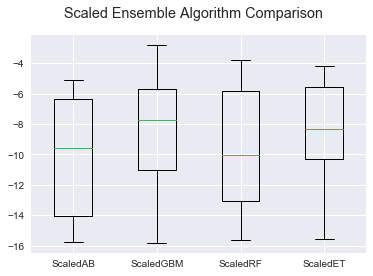

In [48]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -8.212457 using {'n_estimators': 400}
-8.463357 (3.679180) with: {'n_estimators': 50}
-8.385346 (3.818814) with: {'n_estimators': 100}
-8.249694 (3.650612) with: {'n_estimators': 150}
-8.249367 (3.637332) with: {'n_estimators': 200}
-8.237208 (3.690716) with: {'n_estimators': 250}
-8.230976 (3.705113) with: {'n_estimators': 300}
-8.229401 (3.708747) with: {'n_estimators': 350}
-8.212457 (3.635040) with: {'n_estimators': 400}


In [51]:
#prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [52]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

6.584211998053441
